In [2]:
#  Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [4]:
# 📁 Load the dataset
df = pd.read_csv("D600 Task 1 Dataset 1 Housing Information.csv")

In [10]:
# Descriptive statistics for independent variables and the dependent variable
df_model = df[['Price', 'SquareFootage', 'CrimeRate']].copy()

In [8]:
#  Descriptive Statistics
print(df_model.describe())

              Price  SquareFootage    CrimeRate
count  7.000000e+03    7000.000000  7000.000000
mean   3.072820e+05    1048.947459    31.226194
std    1.501734e+05     426.010482    18.025327
min    8.500000e+04     550.000000     0.030000
25%    1.921075e+05     660.815000    17.390000
50%    2.793230e+05     996.320000    30.385000
75%    3.918781e+05    1342.292500    43.670000
max    1.046676e+06    2874.700000    99.730000


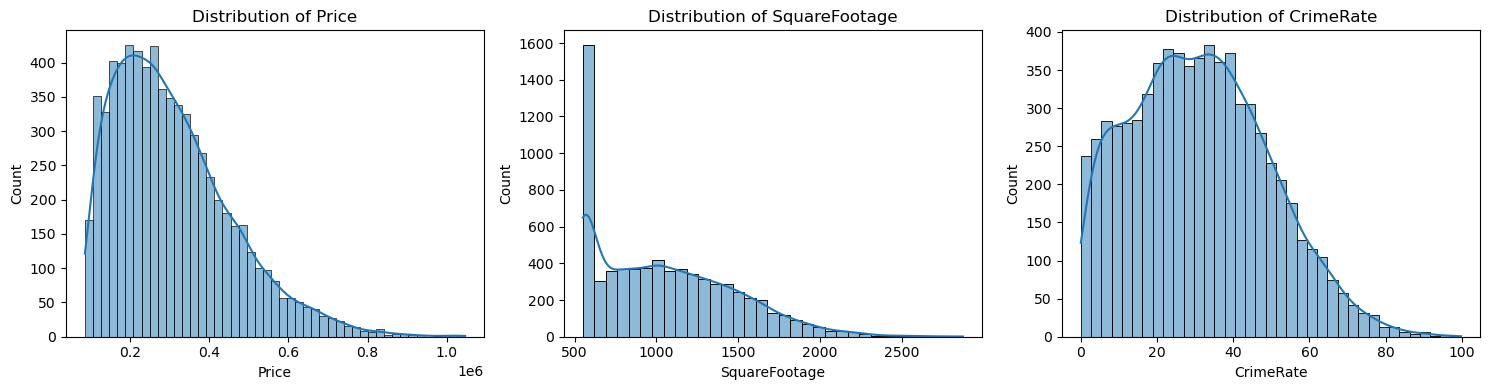

In [12]:
# Univariate Visualizations
plt.figure(figsize=(15, 4))
for i, col in enumerate(df_model.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_model[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

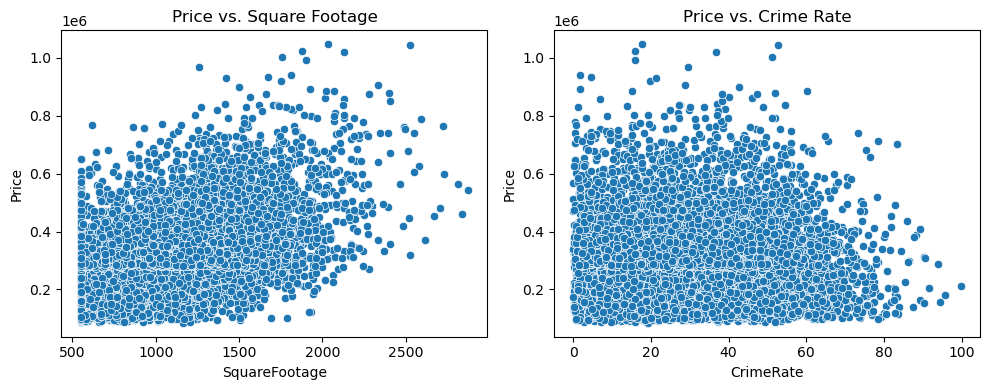

In [14]:
#  Bivariate Visualizations
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_model, x='SquareFootage', y='Price')
plt.title("Price vs. Square Footage")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_model, x='CrimeRate', y='Price')
plt.title("Price vs. Crime Rate")
plt.tight_layout()
plt.show()

In [16]:
# Split the data (80% training, 20% testing)
X = df_model[['SquareFootage', 'CrimeRate']]
y = df_model['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Fit OLS model for training set
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1178.
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        00:31:23   Log-Likelihood:                -73754.
No. Observations:                5600   AIC:                         1.475e+05
Df Residuals:                    5597   BIC:                         1.475e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.16e+05   5483.351     21.153

In [20]:
# Evaluate training set
y_train_pred = model.predict(X_train_sm)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {mse_train:.2f}")



Training MSE: 16110621551.66


In [22]:
#  Evaluate test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_sm)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test:.2f}")

Test MSE: 14417271986.08


In [24]:
#  Check for multicollinearity using VIF
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

         feature        VIF
0          const  10.460117
1  SquareFootage   1.001952
2      CrimeRate   1.001952


In [26]:
#  Final regression equation
intercept = model.params['const']
coef_sqft = model.params['SquareFootage']
coef_crime = model.params['CrimeRate']
print(f"Regression Equation: Price = {intercept:.2f} + {coef_sqft:.2f} * SquareFootage + {coef_crime:.2f} * CrimeRate")

Regression Equation: Price = 115989.40 + 192.36 * SquareFootage + -333.15 * CrimeRate
